## Look stats [8.10]

In [29]:
files = list.files("GeneRax/reconciliations/", "*_eventCounts.txt",full.names = T)
transfers_list = list()

for(file in files){
    t = read.delim(file, head = F, sep = ":")
    rownames(t) = t$V1
    transfers = sum(t[c("T","TL"),2])
    name=gsub(".+\\/","",file)
    name=gsub("_.+","",name)
    transfers_list[[name]] = transfers
}



Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

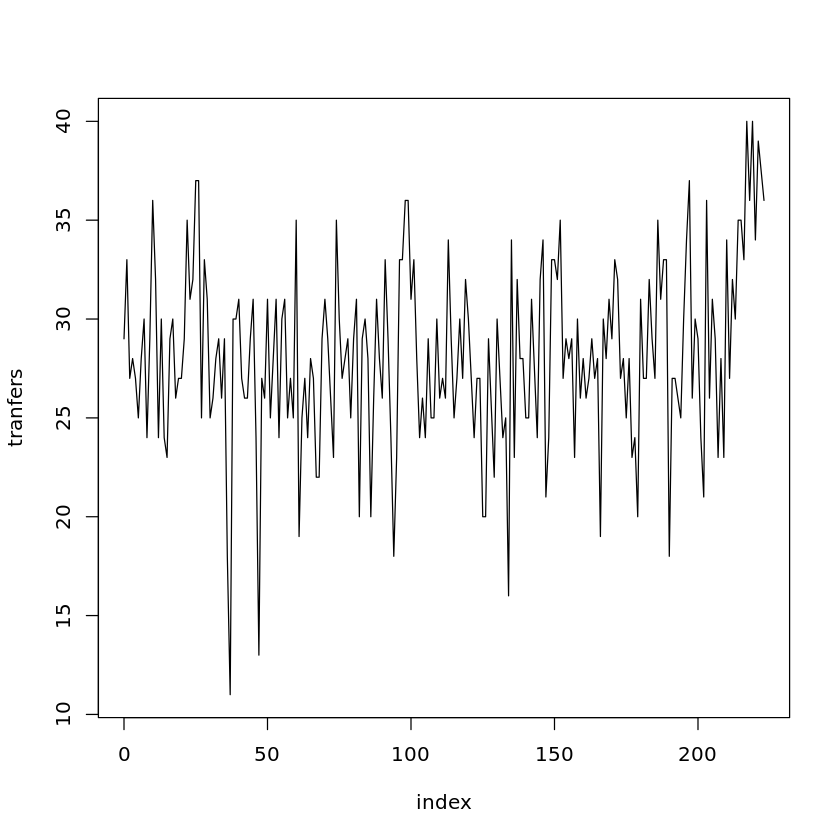

In [65]:
names_int = as.numeric(names(transfers_list))
transfers = unlist(transfers_list)
transfers = transfers[which(!is.na(names_int))]
names_int = names_int[which(!is.na(names_int))]

transfers_df = data.frame(index = names_int, transfers=transfers)
transfers_df = transfers_df[order(transfers_df$index),]
plot(transfers_df$index, transfers_df$transfers,type="l", ylab ="tranfers", xlab = "index")


[1] 28
[1] 28


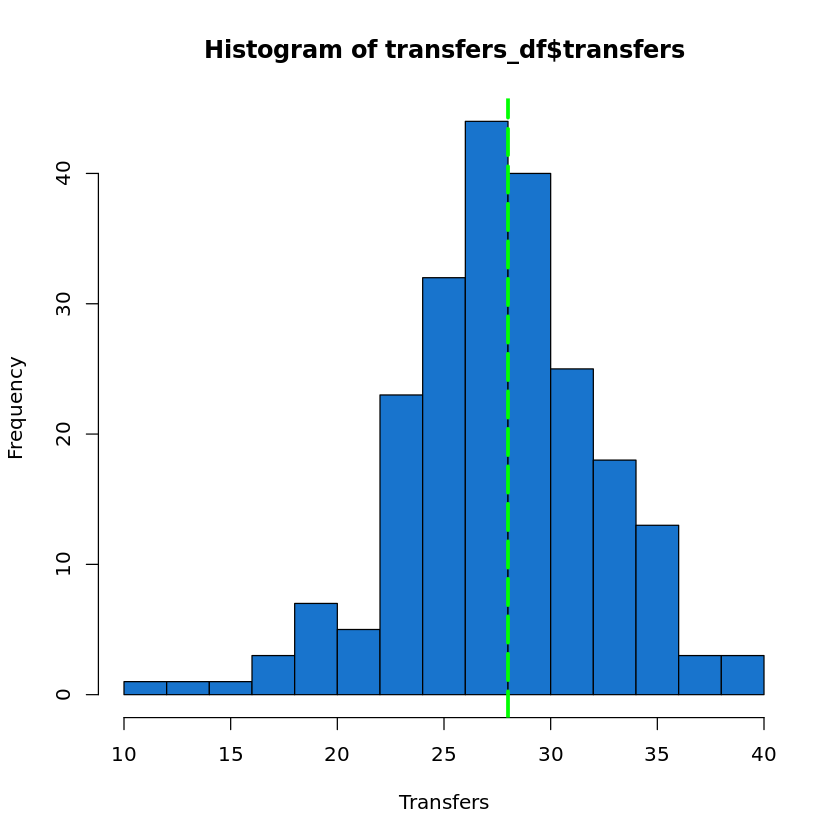

In [73]:
hist(transfers_df$transfers, breaks =20, col = "dodgerblue3", xlab = "Transfers")
abline(v = transfers_list[["pdu"]], col = "green", lwd = 3, lty=5)
print(transfers_list[["pdu"]])
print( median(transfers_df$transfers))

## Run GENERAX for PDU [7.10]


### generate families file

make renamed trees

In [10]:
mkdir -p tree_to_compare/pdu/generax/
mkdir -p tree_to_compare/pdu/generax/gene_trees

for f in  tree_to_compare/pdu/trees/*.raxml.bestTree
do 
    name=$(basename $f .raxml.bestTree)
    oname="tree_to_compare/pdu/generax/gene_trees/$name.nwk"
    sed 's/_//g' $f > $oname
done

(experimental) (experimental) (experimental) (experimental) 

: 1

make renamed alignments

In [28]:
mkdir -p tree_to_compare/pdu/generax/alignments
alignment_dirs=$(ls -d tree_to_compare/pdu/ogs/*)
for aldir in $alignment_dirs
do 
    name=$( basename $aldir)
    cp "$aldir/$name.fasta" "tree_to_compare/pdu/generax/alignments/$name.fasta"
    sed -i 's/_//g' "tree_to_compare/pdu/generax/alignments/$name.fasta"
done

(experimental) (experimental) (experimental) 

: 1

generate families file

In [35]:
trees=$(ls tree_to_compare/pdu/generax/gene_trees/*.nwk)
famfile="tree_to_compare/pdu/generax/families.txt"
echo "[FAMILIES]" > $famfile
for tree in $trees
do
    name=$(basename $tree .nwk)
    echo "- $name"  >> $famfile
    echo "starting_gene_tree = tree_to_compare/pdu/generax/gene_trees/$name.nwk" >> $famfile
    echo "alignment = tree_to_compare/pdu/generax/alignments/$name.fasta" >> $famfile
    echo "subst_model = GTR+G+I" >> $famfile
done

(experimental) (experimental) (experimental) (experimental) 

: 1

add region files

In [41]:
cp /data/ps/operon_travel/tmp/og_in_region/pdu/pdu.fasta.raxml.bestTree tree_to_compare/pdu/generax/gene_trees/pdu.nwk
sed -i 's/_//g' tree_to_compare/pdu/generax/gene_trees/pdu.nwk

(experimental) (experimental) 

: 1

In [45]:
cp /data/ps/operon_travel/tmp/og_in_region/pdu/pdu.fasta tree_to_compare/pdu/generax/alignments/pdu.fasta
sed -i 's/_//g' tree_to_compare/pdu/generax/alignments/pdu.fasta

(experimental) (experimental) 

: 1

In [46]:
name="pdu"
famfile="tree_to_compare/pdu/generax/families.txt"
echo "- $name"  >> $famfile
echo "starting_gene_tree = tree_to_compare/pdu/generax/gene_trees/$name.nwk" >> $famfile
echo "alignment = tree_to_compare/pdu/generax/alignments/$name.fasta" >> $famfile
echo "subst_model = GTR+G+I" >> $famfile

(experimental) (experimental) (experimental) (experimental) (experimental) 

: 1

In [47]:
tail tree_to_compare/pdu/generax/families.txt

alignment = tree_to_compare/pdu/generax/alignments/98.fasta
subst_model = GTR+G+I
- 99
starting_gene_tree = tree_to_compare/pdu/generax/gene_trees/99.nwk
alignment = tree_to_compare/pdu/generax/alignments/99.fasta
subst_model = GTR+G+I
- pdu
starting_gene_tree = tree_to_compare/pdu/generax/gene_trees/pdu.nwk
alignment = tree_to_compare/pdu/generax/alignments/pdu.fasta
subst_model = GTR+G+I
(experimental) 

: 1

### run generax

In [ ]:
generax -f tree_to_compare/pdu/generax/families.txt -s podval/core_rooted.nwk

[00:00:00] GeneRax v1.2.2
Logs will also be printed into GeneRax/generax.log
GeneRax was called as follow:
generax -f tree_to_compare/pdu/generax/families.txt -s podval/core_rooted.nwk 

Parameters summary: 
Families information: tree_to_compare/pdu/generax/families.txt
Species tree: podval/core_rooted.nwk
Species Strategy: SPR
Strategy: SPR
Reconciliation model: UndatedDTL
DTL rates: global rates
Prefix: GeneRax
Unrooted reconciliation likelihood: OFF
Prune species tree: OFF
Reconciliation radius: 0
MPI Ranks: 1
Max gene SPR radius: 5
Gene support threshold: -1
Reconciliation likelihood weight: 1
Random seed: 123
Infer ML reconciliation: ON

[00:00:00] Filtering invalid families...

hey
[00:00:01] Filtering invalid families based on the starting species tree...

[00:00:06] Gathering statistics about the families...
[00:00:06] Input data information:
- Number of gene families: 220
- Number of species: 117
- Total number of genes: 25740
- Average number of genes per family: 117
- Maximu

## Try 1 [7.10]

In [8]:
cp studio/pdu/core_pdu_aligned.fasta.raxml.bestTree podval/core.nwk

(experimental) 

: 1

In [12]:
sed -i 's/_//g' podval/core.nwk

(experimental) 

: 1

In [19]:
cp tree_to_compare/pdu/trees/0.raxml.bestTree podval/0.nwk
cp tree_to_compare/pdu/ogs/0/0.fasta podval/0.fasta
sed -i 's/_//g' podval/0.nwk
sed -i 's/_//g' podval/0.fasta

(experimental) (experimental) (experimental) (experimental) 

: 1

In [4]:
from ete3 import Tree
t = Tree("podval/core.nwk")
midpoint = t.get_midpoint_outgroup()
if not midpoint:  # midpoint = None when their are only two leaves
    midpoint = list(t.get_leaves())[0]
t.set_outgroup(midpoint)
t.write(outfile="podval/core_rooted.nwk")

In [1]:
conda activate experimental

(experimental) 

: 1

In [4]:
generax -f podval/generax_families.txt -s podval/core_rooted.nwk

[00:00:00] GeneRax v1.2.2
Logs will also be printed into GeneRax/generax.log
GeneRax was called as follow:
generax -f podval/generax_families.txt -s podval/core_rooted.nwk 

Parameters summary: 
Families information: podval/generax_families.txt
Species tree: podval/core_rooted.nwk
Species Strategy: SPR
Strategy: SPR
Reconciliation model: UndatedDTL
DTL rates: global rates
Prefix: GeneRax
Unrooted reconciliation likelihood: OFF
Prune species tree: OFF
Reconciliation radius: 0
MPI Ranks: 1
Max gene SPR radius: 5
Gene support threshold: -1
Reconciliation likelihood weight: 1
Random seed: 123
Infer ML reconciliation: ON

[00:00:00] Filtering invalid families...

hey
[00:00:00] Filtering invalid families based on the starting species tree...

[00:00:00] Gathering statistics about the families...
[00:00:00] Input data information:
- Number of gene families: 1
- Number of species: 117
- Total number of genes: 117
- Average number of genes per family: 117
- Maximum number of genes per family: 

: 1